Tanmay Ajay Joshi 200070027

Anubhav Bhatla 200070008

Amruta Mahendra Parulekar 20d070009

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import math

# **Question - 1**

## Part-(a)

At the steady state condition, $\frac{dV(t)}{dt} = 0$. Therefore $V(t) = \frac{I_0}{g_L} + E_L$

To initiate a spike $V_{min} \geq V_T = 20mV$. For $g_L = 30nS$, $E_L = -70mV$, $I_{min} = 2.7nA$.

## Part (b)
$\frac{dV(t)}{dt} = \frac{1}{C} (-g_L(V(t)-E_L)+I_{app}(t)) = f(V(t),t)$

In [2]:
def rk2(GL,C,N,M,h,I,EL):
  spikes = np.zeros(10) #keeps track of the number of spikes for each neuron
  spikeTime = np.zeros(10) #keeps track of the last spike time for each neuron
  arrT=[] #stores the average spike time for each neuron

  V = np.zeros((N,M)) #membrane voltage
  for id in range(N):
    V[id,0] = EL #initialisation
  for time in range((M-1)):
    k1 = -1*(GL/C)*(V[:,time] - EL) + (1/C)*I[:,time]
    V1 = V[:,time] + k1*h/2
    k2 = -1*(GL/C)*(V1-EL) + (1/C)*I[:,time]
    V[:,time + 1] = V[:,time] + k2*h #update the membrane voltage according to Runge-Kutta algorithm
    for i in range(10):
      if (V[i,time + 1] >= 0.02): #identify a spike for a neuron
        V[i, time + 1] = -0.07 #reset the membrane voltage
        spikes[i] = spikes[i] + 1 #increment spike counter
        spikeTime[i] = time*h #keep track of the spike time
  for i in range(10):
    arrT.append(spikeTime[i]/spikes[i]) #update the average spike time

  return V , arrT

The above piece of code is for part 1b. V is a 2D array with N rows and M columns. We first initialize V(0) for each neuron to the equilibrium membrane potential, and then use the Runge Kutta Second-order Midpoint method for solving the differential equation to compute V(t+1) for all neurons.

## Part (c)

In [3]:
# Set the constants appropriately
GL = 30*1e-9
C = 300*1e-12
N = 10
M = 5000
h = 0.1*1e-3
EL = -70*1e-3
alpha = 0.1
arrI=[]
I = np.zeros((N,M)) #stores the current values for each neuron at all time instants
for k in range(N):
  I[k][:] = (1 + (k+1)*alpha)*2.7*1e-9 #assign the constant current value to each neuron
  arrI.append((1 + (k+1)*alpha)*2.7*1e-9) #append the current used

V, arrT = rk2(GL,C,N,M,h,I,EL)

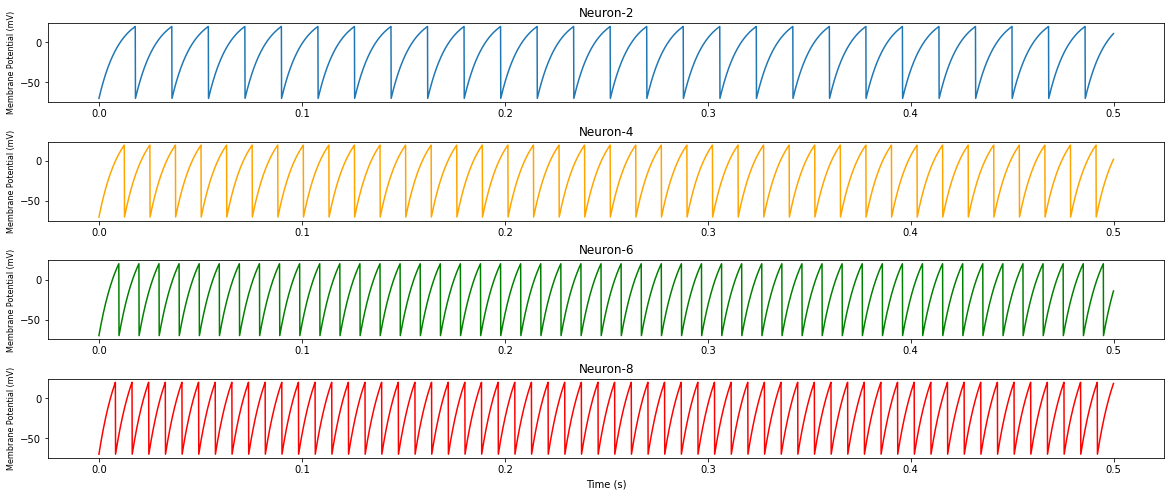

In [4]:
t = np.arange(0,5000)*h #time axis for plotting

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20, 8))

# Plot for Neuron-2
axes[0].plot(t, V[1,:]*1000)
axes[0].set_title("Neuron-2")
axes[0].set_ylabel("Membrane Potential (mV)", fontsize=8)

# Plot for Neuron-4
axes[1].plot(t, V[3,:]*1000, color='orange')
axes[1].set_title("Neuron-4")
axes[1].set_ylabel("Membrane Potential (mV)", fontsize=8)

# Plot for Neuron-6
axes[2].plot(t, V[5,:]*1000, color='green')
axes[2].set_title("Neuron-6")
axes[2].set_ylabel("Membrane Potential (mV)", fontsize=8)

# Plot for Neuron-8
axes[3].plot(t, V[7,:]*1000, color='red')
axes[3].set_title("Neuron-8")
axes[3].set_ylabel("Membrane Potential (mV)", fontsize=8)
axes[3].set_xlabel("Time (s)", fontsize=10)

plt.subplots_adjust(hspace=0.5)

## Part (d)

Text(0, 0.5, 'Time (s)')

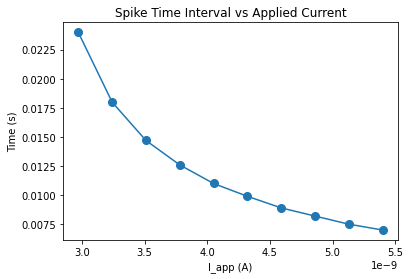

In [5]:
# Plot for Average spike time as current changes
plt.plot(arrI,arrT,marker='o',markersize=8)
plt.title('Spike Time Interval vs Applied Current')
plt.xlabel('I_app (A)')
plt.ylabel('Time (s)')

As we can see, the spike interval decreases, i.e. firing frequency increases with increase in applied current to the neuron

# **Question - 2**

# Part (a)

At steady state,
\begin{equation}
\frac{dV(t)}{dt} = 0, \frac{dU(t)}{dt} = 0
\end{equation}

For $I_{app}(t) = 0$,

Eq.(3) gives:
\begin{equation}
V^{2}(t) - (E_t + E_r)V(t) + E_t E_r = \frac{U(t)}{k_z}
\end{equation}

Eq.(4) gives:
\begin{equation}
V(t) = E_r + \frac{U(t)}{b}
\end{equation}

Substituting V(t) from the second equation into the first:

\begin{equation}
\frac{U^2(t)}{b^2} + \frac{2U(t)E_r}{b} + E^2_r - (E_t + E_r)(E_r + \frac{U(t)}{b}) + E_t E_r = \frac{U(t)}{k_z}
\end{equation}

\begin{equation}
\frac{U^2(t)}{b^2} + U(t)(\frac{E_r}{b} - \frac{E_t}{b} - \frac{1}{k_z}) = 0
\end{equation}

\begin{equation}
U(t)(U(t) + (E_r - E_t)b - \frac{b^2}{k_z}) = 0
\end{equation}

U has two solutions:

\begin{equation}
U(t) = 0, (\frac{b^2}{k_z} - b (E_r - E_t))
\end{equation}

Using the above values, V(t) has two possible solutions:
    
\begin{equation}
V(t) = E_r, \frac{b}{k_z} + E_t
\end{equation}

## Part (b)

The difference equation for (3) is given as:
\begin{equation}
C(\frac{V(k+1)- V(k)}{\Delta t}) = k_z (V(k) - E_r)(V(k) - E_t) - U(k) + I_{app}(k)
\end{equation}

The difference equation for (4) is given as:
\begin{equation}
\frac{U(k+1)- U(k)}{\Delta t} = a [b (V(k) - E_r) - U(k)]
\end{equation}

## Part (c)

In [6]:
def rk4(N,M,h,I,type):
  V = np.zeros((N,M))
  U = np.zeros((N,M))

  # Set the constants based on the neuron type
  C = np.ones(N)
  kz = np.ones(N)
  Er = np.ones(N)
  Et = np.ones(N)
  a = np.ones(N)
  b = np.ones(N)
  c = np.ones(N)
  d = np.ones(N)
  Vpeak = np.ones(N)

  for id in range(N):
    if (type[id] == "RS"):
      C[id] = 100*1e-12
      kz[id] = 0.7*1e-6
      Er[id] = -60*1e-3
      Et[id] = -40*1e-3
      a[id] = 0.03*1e3
      b[id] = -2*1e-9
      c[id] = -50*1e-3
      d[id] = 100*1e-12
      Vpeak[id] = 35*1e-3
    elif (type[id] == "IB"):
      C[id] = 150*1e-12
      kz[id] = 1.2*1e-6
      Er[id] = -70*1e-3
      Et[id] = -45*1e-3
      a[id] = 0.01*1e3
      b[id] = 5*1e-9
      c[id] = -56*1e-3
      d[id] = 130*1e-12
      Vpeak[id] = 50*1e-3
    else:
      C[id] = 50*1e-12
      kz[id] = 1.5*1e-6
      Er[id] = -60*1e-3
      Et[id] = -40*1e-3
      a[id] = 0.03*1e3
      b[id] = 1*1e-9
      c[id] = -40*1e-3
      d[id] = 150*1e-12
      Vpeak[id] = 25*1e-3

    V[id,0] = Er[id] #Initialisation

  for time in range((M-1)):
    kv = (1/C)*(kz*(V[:,time] - Er)*(V[:,time] - Et) + I[:,time] - U[:,time])
    ku = a*(b*(V[:,time] - Er) - U[:,time])
    V[:,time + 1] = V[:,time] + kv*h #update according to Runge-Kutta algorithm
    U[:,time + 1] = U[:,time] + ku*h #update according to Runge-Kutta algorithm

    for i in range(10):
      if (V[i,time + 1] >= Vpeak[i]): #identify spike for a neuron
        V[i, time + 1] = c[i] #reset the membrane voltage
        V[i, time] = Vpeak[i]
        U[i, time + 1] = U[i, time] + d[i]

  return V,U

In [7]:
type = ["RS", "RS", "RS", "IB", "IB", "IB", "CH", "CH", "CH", "CH"] #assign different types for the 10 neurons
N = 10
M = 5000
h = 0.1*1e-3

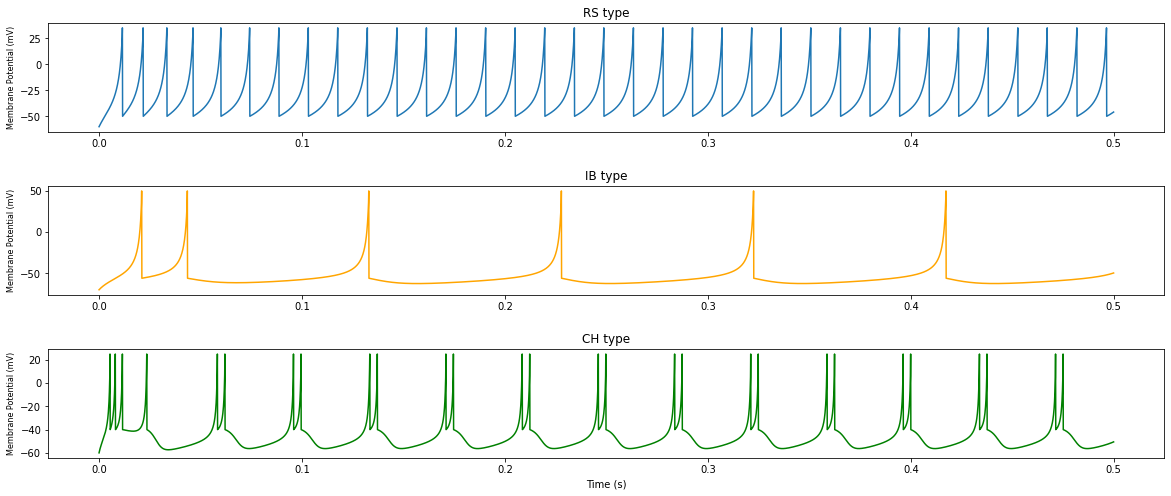

In [8]:
I = 400*1e-12*np.ones((N,M)) #set current to 400pA
V,U = rk4(N,M,h,I,type)
t = np.arange(0,5000)*h

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 8))
plt.title("I_app = 400pA")

# Plot for RS-type neuron
axes[0].plot(t, V[0,:]*1000)
axes[0].set_title("RS type")
axes[0].set_ylabel("Membrane Potential (mV)", fontsize=8)

# Plot for IB-type neuron
axes[1].plot(t, V[3,:]*1000, color='orange')
axes[1].set_title("IB type")
axes[1].set_ylabel("Membrane Potential (mV)", fontsize=8)

# Plot for CH-type neuron
axes[2].plot(t, V[6,:]*1000, color='green')
axes[2].set_title("CH type")
axes[2].set_ylabel("Membrane Potential (mV)", fontsize=8)
axes[2].set_xlabel("Time (s)", fontsize=10)

plt.subplots_adjust(hspace=0.5)

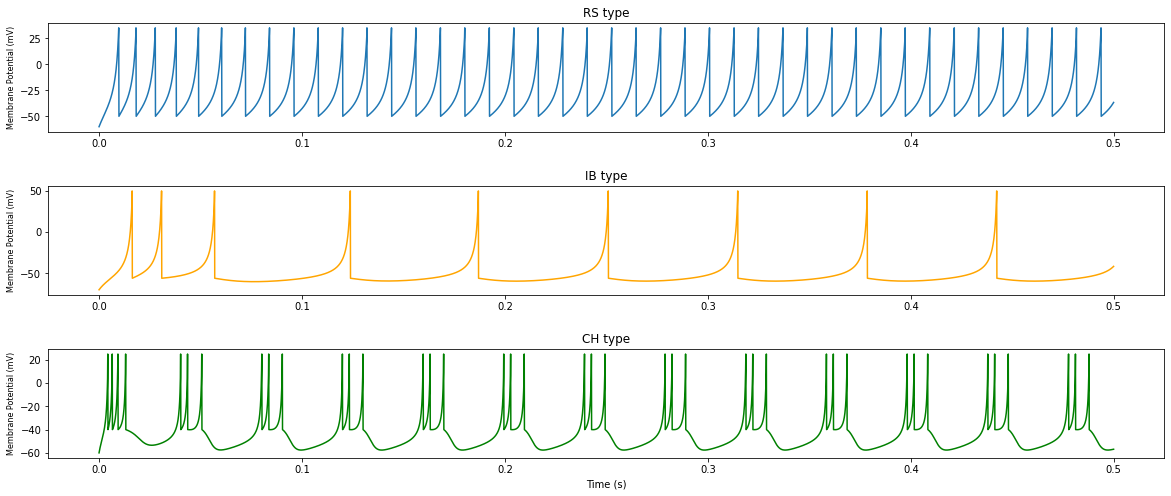

In [9]:
I = 500*1e-12*np.ones((N,M)) #set current to 500pA
V,U = rk4(N,M,h,I,type)
t = np.arange(0,5000)*h

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 8))
plt.title("I_app = 500pA")

# Plot for RS-type neuron
axes[0].plot(t, V[0,:]*1000)
axes[0].set_title("RS type")
axes[0].set_ylabel("Membrane Potential (mV)", fontsize=8)

# Plot for IB-type neuron
axes[1].plot(t, V[3,:]*1000, color='orange')
axes[1].set_title("IB type")
axes[1].set_ylabel("Membrane Potential (mV)", fontsize=8)

# Plot for CH-type neuron
axes[2].plot(t, V[6,:]*1000, color='green')
axes[2].set_title("CH type")
axes[2].set_ylabel("Membrane Potential (mV)", fontsize=8)
axes[2].set_xlabel("Time (s)", fontsize=10)

plt.subplots_adjust(hspace=0.5)

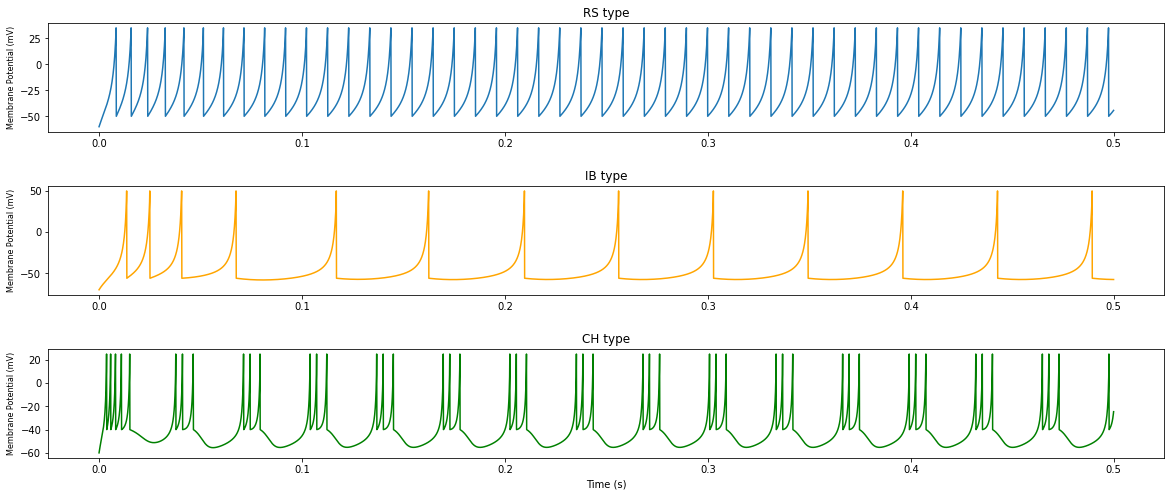

In [10]:
I = 600*1e-12*np.ones((N,M)) #set current to 600pA
V,U = rk4(N,M,h,I,type)
t = np.arange(0,5000)*h

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 8))
plt.title("I_app = 600pA")

# Plot for RS-type neuron
axes[0].plot(t, V[0,:]*1000)
axes[0].set_title("RS type")
axes[0].set_ylabel("Membrane Potential (mV)", fontsize=8)

# Plot for IB-type neuron
axes[1].plot(t, V[3,:]*1000, color='orange')
axes[1].set_title("IB type")
axes[1].set_ylabel("Membrane Potential (mV)", fontsize=8)

# Plot for CH-type neuron
axes[2].plot(t, V[6,:]*1000, color='green')
axes[2].set_title("CH type")
axes[2].set_ylabel("Membrane Potential (mV)", fontsize=8)
axes[2].set_xlabel("Time (s)", fontsize=10)

plt.subplots_adjust(hspace=0.5)

# **Question - 3**

## Part (a)

The difference equation for (5) is given as:
\begin{equation}
C(\frac{V(k+1)- V(k)}{\Delta t}) = -g_L (V(k) - E_L) + g_L\Delta_T \exp{\frac{V(k) - V_T}{\Delta_T}} - U(k) + I_{app}(k)
\end{equation}

The difference equation for (6) is given as:
\begin{equation}
\tau_w(\frac{U(k+1)- U(k)}{\Delta t}) = a [V(k) - E_L] - U(k)
\end{equation}

## Part (b)

Under the steady state condition and $I_{app} = 0$:
\begin{equation}
U_{\infty} = -g_L (V_{\infty} - E_L) + g_L \Delta_T \exp({\frac{V_{\infty} - V_T}{\Delta_T}})
\end{equation}

\begin{equation}
U_{\infty} = a[V_{\infty} - E_L]
\end{equation}

Solving the two equations, we get:
\begin{equation}
V_{\infty} = E_L + \frac{g_L \Delta_T}{g_L + a}(\exp{(\frac{V_{\infty} - V_T}{\Delta_T}}))
\end{equation}

In [11]:
def steadystate(type):
  # Set the constants based on the neuron type
  if (type == "RS"):
    C = 200*1e-12
    gL = 10*1e-9
    EL = -70*1e-3
    VT = -50*1e-3
    deltaT = 2*1e-3
    a = 2*1e-9
    tauw = 30*1e-3
    b = 0
    Vr = -58*1e-3
  elif (type == "IB"):
    C = 130*1e-12
    gL = 18*1e-9
    EL = -58*1e-3
    VT = -50*1e-3
    deltaT = 2*1e-3
    a = 4*1e-9
    tauw = 150*1e-3
    b = 120*1e-12
    Vr = -50*1e-3
  else:
    C = 200*1e-12
    gL = 10*1e-9
    EL = -58*1e-3
    VT = -50*1e-3
    deltaT = 2*1e-3
    a = 2*1e-9
    tauw = 120*1e-3
    b = 100*1e-12
    Vr = -46*1e-3

  v = -50*1e-3 #choose a random initial value
  v_next = EL + ((gL*deltaT)/(gL+a))*(pow(math.e,((v - VT)/deltaT))) #set next voltage value

  while (abs(v_next - v) > 1e-6): #voltage is not precise enough
    v = v_next #update voltage for the next iteration
    v_next = EL + ((gL*deltaT)/(gL+a))*(pow(math.e,((v - VT)/deltaT))) #set next voltage value

  u = a*(v-EL) #calculate U_inf from V_inf
  return(v,u)

In [12]:
# Steady state value for RS-type neuron
v,u = steadystate("RS")
print("RS type: V =", v*1000, "mV; U =", u*1000, "mV")
# Steady state value for IB-type neuron
v,u = steadystate("IB")
print("IB type: V =", v*1000, "mV; U =", u*1000, "mV")
# Steady state value for CH-type neuron
v,u = steadystate("CH")
print("CH type: V =", v*1000, "mV; U =", u*1000, "mV")

RS type: V = -69.99982589309361 mV; U = 3.4821381278415943e-13 mV
IB type: V = -57.968993570560826 mV; U = 1.2402571775671502e-10 mV
CH type: V = -57.96838281593416 mV; U = 6.323436813167327e-11 mV


## Steady-state values:
**RS type neuron:** $V \approx -70mV$ ; $U \approx 3.48 \times 10^{-13} mV$

**IB type neuron:** $V \approx -58mV$ ; $U \approx 1.24 \times 10^{-10} mV$

**CH type neuron:** $V \approx -58mV$ ; $U \approx 6.32 \times 10^{-11} mV$


## Part (c)

In [13]:
def euler(N,M,h,I,type):

  V = np.zeros((N,M))
  U = np.zeros((N,M))

  # Set constants based on the neuron type
  C = np.ones(N)
  gL = np.ones(N)
  EL = np.ones(N)
  VT = np.ones(N)
  deltaT = np.ones(N)
  a = np.ones(N)
  tauw = np.ones(N)
  b = np.ones(N)
  Vr = np.ones(N)

  for id in range(N):
    V[id,0], U[id,0] = steadystate(type[id]) #initilise to the steady state values
    if (type[id] == "RS"):
      C[id] = 200*1e-12
      gL[id] = 10*1e-9
      EL[id] = -70*1e-3
      VT[id] = -50*1e-3
      deltaT[id] = 2*1e-3
      a[id] = 2*1e-9
      tauw[id] = 30*1e-3
      b[id] = 0
      Vr[id] = -58*1e-3
    elif (type[id] == "IB"):
      C[id] = 130*1e-12
      gL[id] = 18*1e-9
      EL[id] = -58*1e-3
      VT[id] = -50*1e-3
      deltaT[id] = 2*1e-3
      a[id] = 4*1e-9
      tauw[id] = 150*1e-3
      b[id] = 120*1e-12
      Vr[id] = -50*1e-3
    else:
      C[id] = 200*1e-12
      gL[id] = 10*1e-9
      EL[id] = -58*1e-3
      VT[id] = -50*1e-3
      deltaT[id] = 2*1e-3
      a[id] = 2*1e-9
      tauw[id] = 120*1e-3
      b[id] = 100*1e-12
      Vr[id] = -46*1e-3

  for time in range((M-1)):
    kv = (1/C)*(-gL*(V[:,time] - EL) + gL*deltaT*pow(math.e,((V[:,time] - VT)/deltaT)) + I[:,time] - U[:,time])
    ku = (1/tauw)*(a*(V[:,time] - EL) - U[:,time])
    V[:,time + 1] = V[:,time] + kv*h #updated V using Euler's method
    U[:,time + 1] = U[:,time] + ku*h #updated U using Euler's method
    for i in range(N):
      if (V[i,time + 1] >= 0): #identify a spike for a neuron
        V[i, time + 1] = Vr[i] # reset the voltage
        V[i, time] = 0
        U[i, time + 1] = U[i, time] + b[i] # reset U

  return V,U

In [14]:
type = ["RS", "RS", "RS", "IB", "IB", "IB", "CH", "CH", "CH", "CH"]
N = 10
M = 5000
h = 0.1*1e-3

$\Large I_{app} = 250pA$

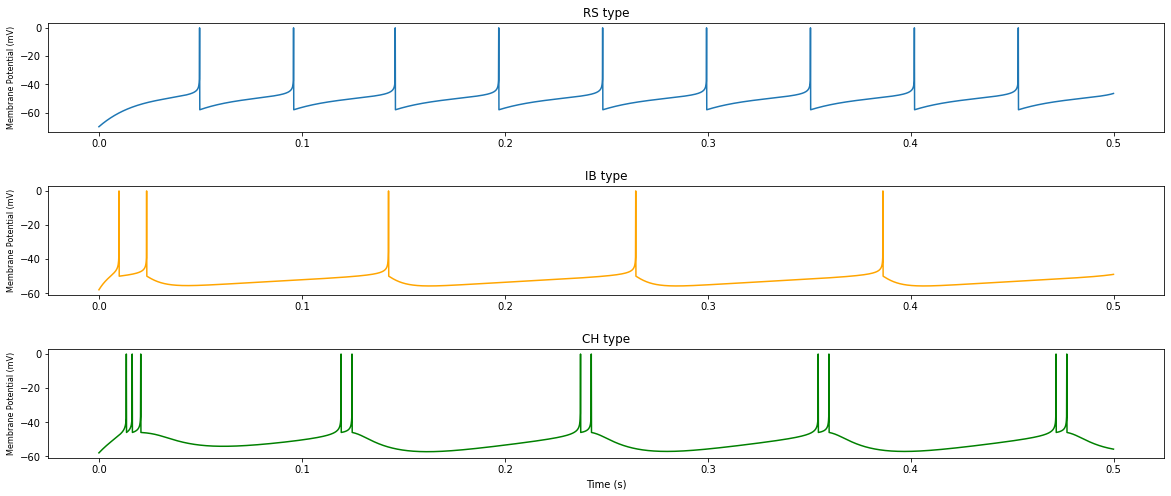

In [15]:
I = 250*1e-12*np.ones((N,M))
V,U = euler(N,M,h,I,type)
t = np.arange(0,5000)*h

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 8))
plt.title("I_app = 250pA")

axes[0].plot(t, V[0,:]*1000)
axes[0].set_title("RS type")
axes[0].set_ylabel("Membrane Potential (mV)", fontsize=8)

axes[1].plot(t, V[3,:]*1000, color='orange')
axes[1].set_title("IB type")
axes[1].set_ylabel("Membrane Potential (mV)", fontsize=8)

axes[2].plot(t, V[6,:]*1000, color='green')
axes[2].set_title("CH type")
axes[2].set_ylabel("Membrane Potential (mV)", fontsize=8)
axes[2].set_xlabel("Time (s)", fontsize=10)

plt.subplots_adjust(hspace=0.5)

$\Large I_{app} = 350pA$

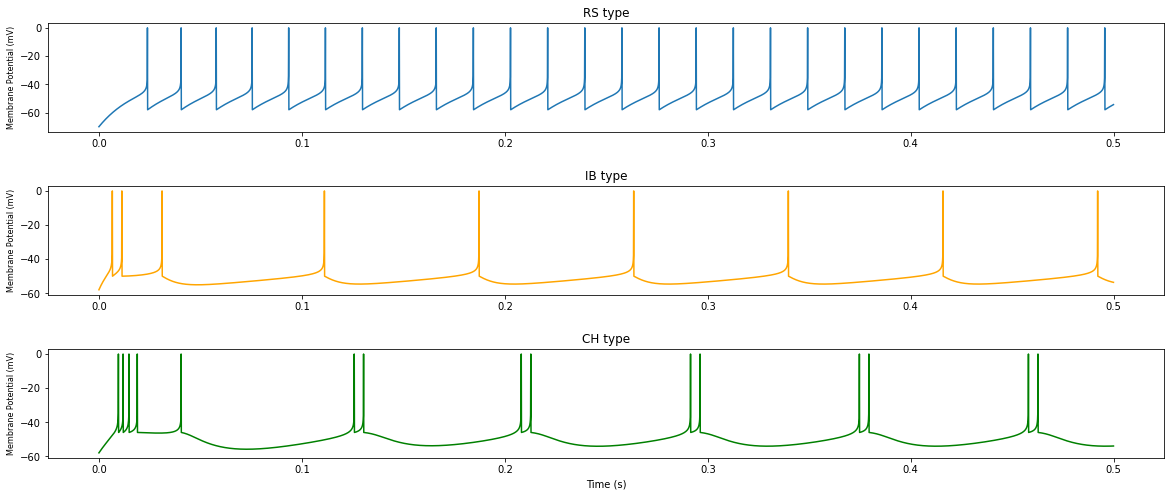

In [16]:
I = 350*1e-12*np.ones((N,M))
V,U = euler(N,M,h,I,type)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 8))
plt.title("I_app = 350pA")

axes[0].plot(t, V[0,:]*1000)
axes[0].set_title("RS type")
axes[0].set_ylabel("Membrane Potential (mV)", fontsize=8)

axes[1].plot(t, V[3,:]*1000, color='orange')
axes[1].set_title("IB type")
axes[1].set_ylabel("Membrane Potential (mV)", fontsize=8)

axes[2].plot(t, V[6,:]*1000, color='green')
axes[2].set_title("CH type")
axes[2].set_ylabel("Membrane Potential (mV)", fontsize=8)
axes[2].set_xlabel("Time (s)", fontsize=10)

plt.subplots_adjust(hspace=0.5)

$\Large I_{app} = 450pA$

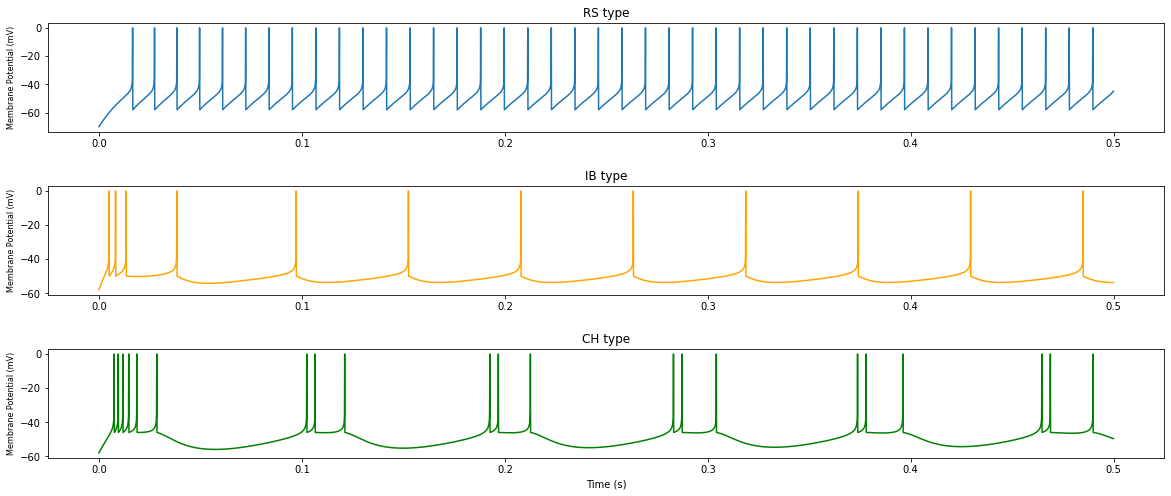

In [17]:
I = 450*1e-12*np.ones((N,M))
V,U = euler(N,M,h,I,type)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 8))
plt.title("I_app = 450pA")

axes[0].plot(t, V[0,:]*1000)
axes[0].set_title("RS type")
axes[0].set_ylabel("Membrane Potential (mV)", fontsize=8)

axes[1].plot(t, V[3,:]*1000, color='orange')
axes[1].set_title("IB type")
axes[1].set_ylabel("Membrane Potential (mV)", fontsize=8)

axes[2].plot(t, V[6,:]*1000, color='green')
axes[2].set_title("CH type")
axes[2].set_ylabel("Membrane Potential (mV)", fontsize=8)
axes[2].set_xlabel("Time (s)", fontsize=10)

plt.subplots_adjust(hspace=0.5)

# **Question - 4**

The difference equation for (7) is given as:
\begin{equation}
C(\frac{V(k+1)- V(k)}{\Delta t}) = -i_{Na}(k) - i_{K}(k)  - i_{l}(k) + I_{ext}(k)
\end{equation}

The difference equation for (8) is given as:
\begin{equation}
i_{Na}(k) = g_{Na} (m(k))^3 h(k) [(V(k) - E_{Na}]
\end{equation}


The difference equation for (9) is given as:
\begin{equation}
i_{K}(k) = g_{K} (n(k))^4  [(V(k) - E_{K}]
\end{equation}


The difference equation for (10) is given as:
\begin{equation}
i_{l}(k) = g_{l} [(V(k) - E_{l}]
\end{equation}


The difference equation for (11) is given as:
\begin{equation}
\frac{x(k+1) - x(k)}{\Delta t} = \alpha_{x}(k) (1 - x(k)) - \beta_{x}(k) x(k)
\end{equation}

where x $\in$ {n, m, h}

In [18]:
T = 30E-3
N = int(30/0.01)
t = 0.01
#Defining all the arrays for quantities which change with time

Iext = np.zeros(5*N)
V = np.zeros(5*N)
INa = np.zeros(5*N)
IK = np.zeros(5*N)
Il = np.zeros(5*N)

m = np.zeros(5*N)
n = np.zeros(5*N)
h = np.zeros(5*N)

An = np.zeros(5*N)
Bn = np.zeros(5*N)

Am = np.zeros(5*N)
Bm = np.zeros(5*N)

Ah = np.zeros(5*N)
Bh = np.zeros(5*N)

#Declaring all constants used in equations (7) - (11)

C = 1
ENa = 50
EK = -77
El = -55
gNa = 120
gK = 36
gl = 0.3
I0 = 15

for init in range(5*N):
    if(init>=2*N and init<=3*N):
        Iext[init] = I0

#Initial conditions: equilibrium for membrane potential and derivatives of m, n, h zero
V[0] = -65.15
An[0] = (0.01)*(V[0] +55)/(1-pow(math.e,(-1*(V[0]+55)/10)))
Am[0] = (0.1)*(V[0] +40)/(1-math.e**(-1*(V[0]+40)/10))
Ah[0] = (0.07)*(math.e**(-0.05*(V[0]+65)))

Bn[0] = 0.125*(math.e**(-1*(V[0]+65)/80))
Bm[0] = 4*(math.e**(-0.0556*(V[0]+65)))
Bh[0] = 1/(1+math.e**(-0.1*(V[0]+35)))

n[0] = An[0]/(An[0] + Bn[0])
m[0] = Am[0]/(Am[0] + Bm[0])
h[0] = Ah[0]/(Ah[0] + Bh[0])

INa[0] = gNa*((m[0])**3)*(h[0])*(V[0]-ENa)
IK[0] = gK*((n[0])**4)*(V[0]-EK)
Il[0] = gl*(V[0]-El)

V[1] = V[0] +t*(1/C)*(Iext[0] - INa[0] - IK[0] - Il[0])
m[1] = m[0] + t*(Am[0]*(1-m[0])-Bm[0]*m[0])
n[1] = n[0] + t*(An[0]*(1-n[0])-Bn[0]*n[0])
h[1] = h[0] + t*(Ah[0]*(1-h[0])-Bh[0]*h[0])

#Implementing the difference equations for (7) to (11):
for k in range (1,5*N - 1):
    An[k] = (0.01)*(V[k] +55)/(1-pow(math.e,(-1*(V[k]+55)/10)))
    Am[k] = (0.1)*(V[k] +40)/(1-math.e**(-(V[k]+40)/10))
    Ah[k] = (0.07)*(math.e**(-0.05*(V[k]+65)))

    Bn[k] = 0.125*(math.e**(-(V[k]+65)/80))
    Bm[k] = 4*(math.e**(-0.0556*(V[k]+65)))
    Bh[k] = 1/(1+math.e**(-0.1*(V[k]+35)))

    m[k+1] = m[k] + t*(Am[k]*(1-m[k])-Bm[k]*m[k])
    n[k+1] = n[k] + t*(An[k]*(1-n[k])-Bn[k]*n[k])
    h[k+1] = h[k] + t*(Ah[k]*(1-h[k])-Bh[k]*h[k])

    INa[k] = gNa*((m[k])**3)*(h[k])*(V[k]-ENa)
    IK[k] = gK*((n[k])**4)*(V[k]-EK)
    Il[k] = gl*(V[k]-El)

    V[k+1] = V[k] +t*(1/C)*(Iext[k] - INa[k] - IK[k] - Il[k])

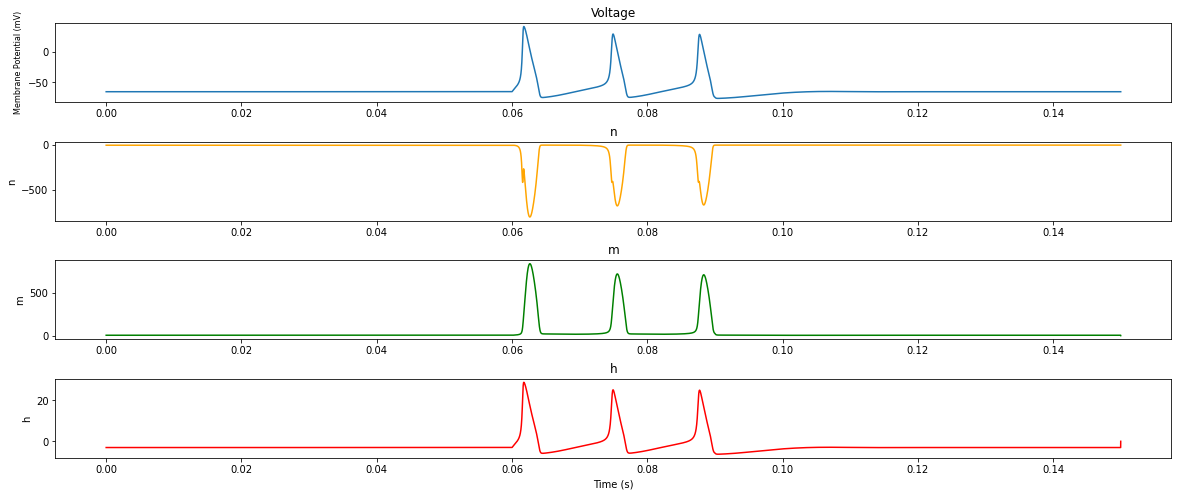

In [19]:
t = np.arange(0,5*N)*1E-5
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20, 8))
plt.title("I_app = 450pA")

axes[0].plot(t, V[:])
axes[0].set_title("Voltage")
axes[0].set_ylabel("Membrane Potential (mV)", fontsize=8)

axes[1].plot(t, INa[:], color='orange')
axes[1].set_title("n")
axes[1].set_ylabel("n", fontsize=10)

axes[2].plot(t, IK[:], color='green')
axes[2].set_title("m")
axes[2].set_ylabel("m", fontsize=10)

axes[3].plot(t, Il[:], color='red')
axes[3].set_title("h")
axes[3].set_ylabel("h", fontsize=10)
axes[3].set_xlabel("Time (s)", fontsize=10)

plt.subplots_adjust(hspace=0.5)

In [20]:
#power calculations
PNa_dissipation = np.zeros(5*N)
PK_dissipation = np.zeros(5*N)
Pl_dissipation = np.zeros(5*N)
P_capacitor = np.zeros(5*N)
for time in range(5*N-1):
    PNa_dissipation[time] = INa[time]*(V[time] - ENa)*1E-9
    PK_dissipation[time] = IK[time]*(V[time] - EK)*1E-9
    Pl_dissipation[time] = Il[time]*(V[time] - El)*1E-9
    P_capacitor[time] = (V[time])*(Iext[time] - INa[time] - IK[time] - Il[time])*1E-9
    #This is power per unit area

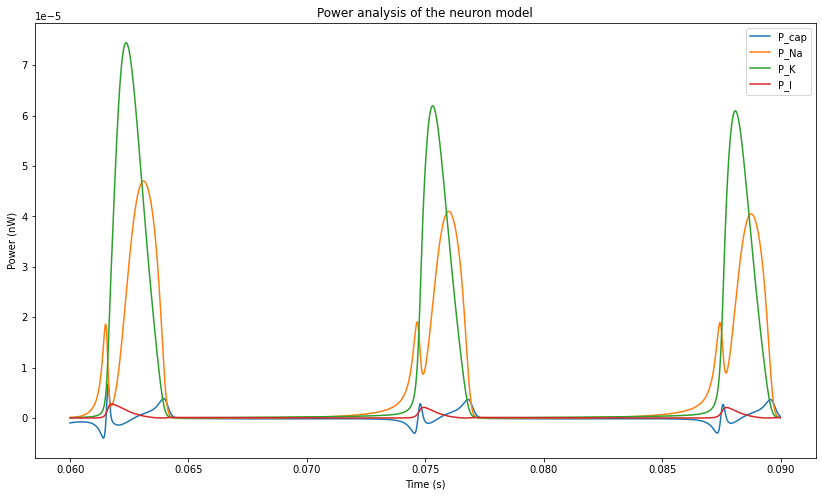

In [21]:

plt.figure(figsize=(14,8))
plt.plot(t[2*N:3*N],P_capacitor[2*N:3*N])
plt.plot(t[2*N:3*N],PNa_dissipation[2*N:3*N])
plt.plot(t[2*N:3*N],PK_dissipation[2*N:3*N])
plt.plot(t[2*N:3*N],Pl_dissipation[2*N:3*N])
plt.title('Power analysis of the neuron model')
plt.xlabel('Time (s)')
plt.ylabel('Power (nW)')
plt.legend(['P_cap','P_Na','P_K','P_l'])

In [22]:
Pnet = (P_capacitor + PNa_dissipation + PK_dissipation + Pl_dissipation)*1E-8
E = np.zeros(5*N)
E[0] = 0
for time in range(5*N - 1):
    E[time+1] = E[time] - (Pnet[time])*0.01

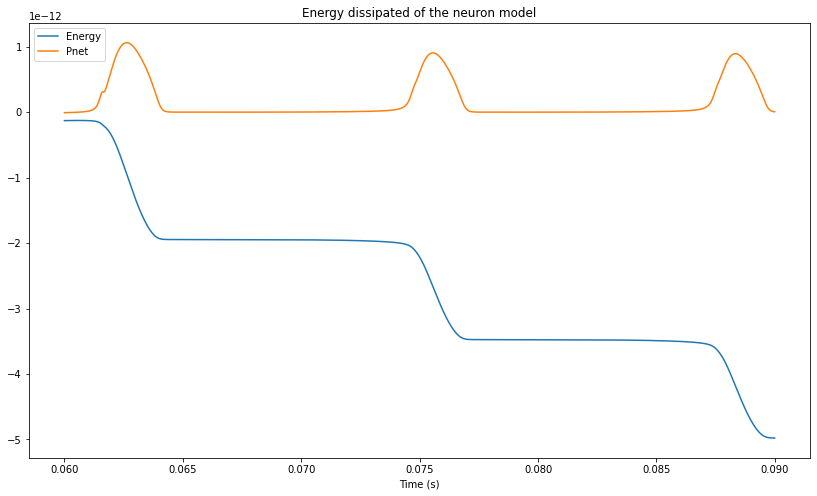

In [23]:
plt.figure(figsize=(14,8))
plt.plot(t[2*N:3*N],E[2*N:3*N])
plt.plot(t[2*N:3*N],Pnet[2*N:3*N])
plt.title('Energy dissipated of the neuron model')
plt.xlabel('Time (s)')
plt.legend(['Energy','Pnet'])


In [24]:
Ediss = E[0]
count = 0
Eav = 0
Ppeak = np.zeros(5*N)
for k in range(1,5*N-1):
    if(Pnet[k]>Pnet[k-1] and Pnet[k] > Pnet[k+1] and Pnet[k]>0.5E-12):
        #Ediss is the net energy dissipated in the entire experiment
        #Eav is the average energy dissipated in one peak
        Ediss = Ediss - E[k]
        Eav = (Eav*count - E[k])/(count + 1)
        count = count + 1
print(Eav)
print(Ediss)


2.598007375940803e-12
7.794022127822409e-12


Here, Ediss is the net energy dissipated in the entire experiment \\
Eav is the average energy dissipated in one peak